# What would today's Asian American and Pacific Islander population be if Japanese-Americans were deported rather than interned in 1942?

Colin Takeda and Nathan Weil
ModSim Project 1


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# Question

What would today's Asian American and Pacific Islander (API) population be if Japanese-Americans were deported rather than interned in 1942?

What would be today's percent population of Asian Americans and Pacific Islanders in the US be in comparison to the real percent population?

# Model

Inputs: 
- Asian-American and Pacific Islander population from 1940 -2010
- Total number of Japanese-Americans interned
- Populations of all other ethnicities from 1940 -2010

Actions: 
- Simulate change in population of API over time and plot
- Apply model function to population of API minus Japanese-Americans interned

Metrics: 
- Projected population of API from 1940-2010
- Percent of US population for real and model API over time

## Census Data

In [2]:
# Importing raw data .csv file
raw_data = pd.read_csv('data/api_simple.csv', index_col='time')

# Importing US population data
us_pop = pd.read_csv('data/poppercentage.csv', index_col='time')

# Converting data to population (millions)
raw_data = raw_data/(1e6)

# Creating a time series
data = TimeSeries()

# Applying data values to time series
for i in range(0, 8):
    data[raw_data.index[i]] = raw_data.popu[raw_data.index[i]]

In [3]:
# Plot results function for both data and model
def plot_results(data, results, title):
    
    plot(data, '-', label='Real API Population')
    plot(results, '-', label='Model API Population')

    decorate(xlabel='Year', 
             ylabel='Population (millions)',
             title=title)

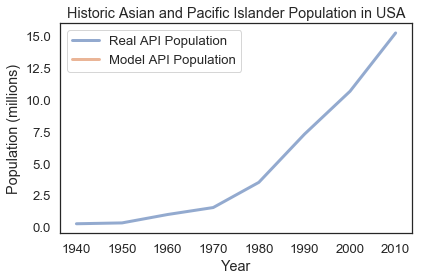

In [4]:
# Creates empty time series to show only data 
empty = TimeSeries()

# Runs plot_results function with only data
plot_results(data, empty, 'Historic Asian and Pacific Islander Population in USA')

## Model

In [5]:
# Defines system variables for model
system = System (alpha = 0.0747, 
                 beta = -.0032, 
                 p_0 = data[1940], 
                 t_0 = 1940, 
                 t_end = 2010)

,values
alpha,0.074700
beta,-0.003200
p_0,0.254918
t_0,1940.000000
t_end,2010.000000


In [6]:
# Applies update_func to input population and returns time series of model
def run_simulation (update_func, system):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange (system.t_0, system.t_end):
        results[t+1] = update_func(results[t], system)

    return results

In [7]:
# Calculates next value for given year
def update_func(pop, system):
    
    net_growth = system.alpha * pop + system.beta * pop**2
    population = pop + net_growth
    
    return population

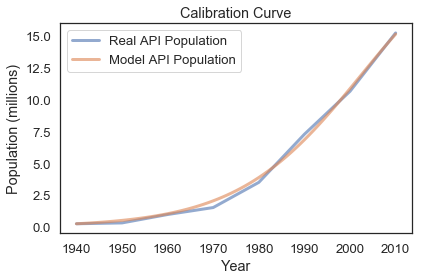

In [8]:
# Runs simulation and holds results
results = run_simulation(update_func, system)

# Plots data and model 
plot_results(data, results, "Calibration Curve")

## Results

In [9]:
# Defines system variables for model
system = System (alpha = 0.0747, 
                 beta = -.0032, 
                 p_0 = 0.134918, 
                 t_0 = 1940, 
                 t_end = 2010)

,values
alpha,0.074700
beta,-0.003200
p_0,0.134918
t_0,1940.000000
t_end,2010.000000


Actual 2010 Population:  15.214265  million
Theoretical 2010 Population:  11.33051412826513 million


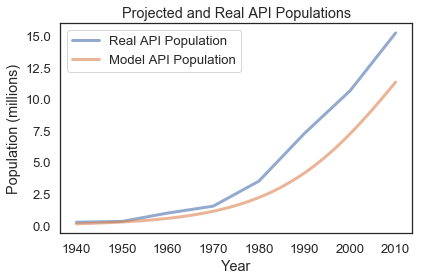

In [10]:
# Runs simulation and holds results
results = run_simulation(update_func, system)

# Plots data and model 
plot_results(data, results, "Projected and Real API Populations")

# Saves final (2010) populations for data and model
data_final = data[2010]
model_final = results[2010]

print('Actual 2010 Population: ', data_final, ' million')
print('Theoretical 2010 Population: ', model_final, 'million')

## Asian American and Pacific Islander Percent Population of US

In [11]:
# Finds the real API percentage of US population 
def percentpop_real(us_pop):
    us_pop.apireal = us_pop.apireal/1e6
    us_pop.uspopreal = us_pop.uspopreal/1e6
    
    realpercentage = TimeSeries()
    
        
    for i in range(0, 8):
        realpercentage[us_pop.index[i]] = us_pop.apireal[us_pop.index[i]] / us_pop.uspopreal[us_pop.index[i]] *100
    
    return realpercentage

In [12]:
# Calculates the model API percentage of US population
def calculate(us, model):

    percentage = (model/(us + model))*100
    
    return percentage

In [13]:
# Calls calculate function and stores in time series
def percentpop_model(us_pop, results):

    us_pop.uspop = us_pop.uspop/1e6
    
    modelpercentage = TimeSeries()

    for i in range(0, 8):   
        modelpercentage[us_pop.index[i]] = calculate(us_pop.uspop[us_pop.index[i]], results[us_pop.index[i]])
        
    return modelpercentage

In [14]:
# Plot results function for both data and model
def plot_percent(data, results, title):
    
    plot(data, '-', label='Real API Percentage')
    plot(results, '-', label='Model API Percentage')

    decorate(xlabel='Year', 
             ylabel='Percent of US Population',
             title=title)

Actual API Percentage:  4.927768381222727
Model API Percentage:  3.716606871263278


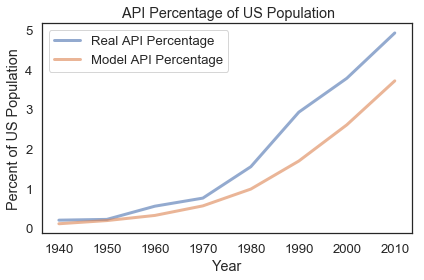

In [15]:
# Calls and stores model and real API percentage time series
real_percent = percentpop_real(us_pop)
model_percent = percentpop_model(us_pop, results)

# Plots both model and real API Percentages
plot_percent(real_percent, model_percent, ' API Percentage of US Population')

# Saves 2010 model and real API Percentages
real_end_percent = real_percent[2010]
model_end_percent = model_percent[2010]

print('Actual API Percentage: ', real_end_percent)
print('Model API Percentage: ', model_end_percent)

## Interpretation 

This final figure shows how the initial change in the population of Japanese-Americans could change the US population percentage of Asian-Amiericans and Pacific Islanders (API) today. The choice to use Japanese-Americans as a factor to affect the overall population of API is due to the fact that in 1942 Japanese-Americans were one of the largest Asian populations at the time. This would then change future ethnic demographics within the broader population in the future. Also, the density of internment camps on the West coast and the current density of API on the west coast could have been affected if about 135,000 people were deported. 

The model was first calibrated to the census data on API and then applied to the API population minus the number of interned individuals. The model was then ran with the new initial population to provide a predicted API population from 1940 - 2010. The model function was hand calibrated, yet still fit the data very well. 

The model achieved the goal of predicting the decrease of the model API population compared to the real API population, 3.88 million. 

Also, this model showed how the percentage of API would change compared to other ethnic populations in the US. In the end, the percent difference of the real API percent population and the model API percent population is 24.5%. 

In the future, we would like to find an intersection point between the model and actual data to find the year the API population would recover. This would show how far the initial change would affect the total growth of the API population. 